# Quiz 7 - Zipf's Law Application 

## Student: Rodolfo Lerma

Study Manning Chapter 1.

Use the Brown corpus to create the graph based on English, representing Zipf's Law. 
To download the `Brown Corpus`. In Python, do:

- **import nltk**
- **nltk.download()**

This brings up a window (GUI) with tabs at the top.  Select the tab labeled `Corpora` and select `Brown` and click the download button at the bottom of the window.

- *What type of words are the most frequent?*
- *Discuss about what Zipf’s Law really tells us about the frequency distribution of words.*

In [4]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import brown
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
browncorpuswords = brown.words()

### 1) What type of words are the most frequent? 

**Without removing any stop words**

In [5]:
freqwords = FreqDist([i.lower() for i in browncorpuswords if i.isalpha()]) #Remove puntuation

In [6]:
print(freqwords.most_common(100), end = '')

[('the', 69971), ('of', 36412), ('and', 28853), ('to', 26158), ('a', 23195), ('in', 21337), ('that', 10594), ('is', 10109), ('was', 9815), ('he', 9548), ('for', 9489), ('it', 8760), ('with', 7289), ('as', 7253), ('his', 6996), ('on', 6741), ('be', 6377), ('at', 5372), ('by', 5306), ('i', 5164), ('this', 5145), ('had', 5133), ('not', 4610), ('are', 4394), ('but', 4381), ('from', 4370), ('or', 4206), ('have', 3942), ('an', 3740), ('they', 3620), ('which', 3561), ('one', 3292), ('you', 3286), ('were', 3284), ('her', 3036), ('all', 3001), ('she', 2860), ('there', 2728), ('would', 2714), ('their', 2669), ('we', 2652), ('him', 2619), ('been', 2472), ('has', 2437), ('when', 2331), ('who', 2252), ('will', 2245), ('more', 2215), ('if', 2198), ('no', 2139), ('out', 2097), ('so', 1985), ('said', 1961), ('what', 1908), ('up', 1890), ('its', 1858), ('about', 1815), ('into', 1791), ('than', 1790), ('them', 1788), ('can', 1772), ('only', 1748), ('other', 1702), ('new', 1635), ('some', 1618), ('could'

As we can see in list above the most frequent words in this corpus are small words known as `function words`. Such as words are: determiners, preposition and complementizers, which have important grammatical roles.

In [37]:
y = freqwords.most_common(500)

In [38]:
words = []
frequency = []
rank = []
constants = []
for i in y:
    words.append(i[0])
    frequency.append(i[1])

for i in range(len(y)):
    rank.append(i+1)
    constants.append(frequency[i]*(i+1))

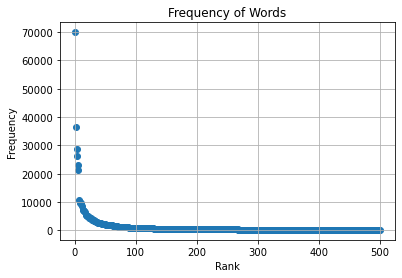

In [39]:
import matplotlib.pyplot as plt
plt.scatter(rank, frequency)
plt.title('Frequency of Words')
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid()
plt.show()

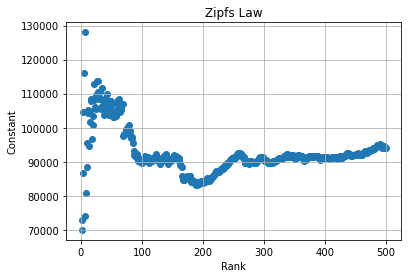

In [40]:
plt.scatter(rank, constants)
plt.title('Zipfs Law')
plt.xlabel("Rank")
plt.ylabel("Constant")
plt.grid()
plt.show()

### 2) Discuss about what Zipf’s Law really tells us about the frequency distribution of words.

This is a very interesting empirical observation, which comes from the initial argument present in Zipf's book: `Behavior and the Principle of Least Effort`. In this Zipf's argues that people will act so that they can minimize their average rate of work (in every field). 

According with this idea/argument both the speaker and the listener try to minimize their efforts during the communication process, but this is done in different ways. By the speaker this is done by the repetition of common words during the any dialog (being verbal or in writing). By doing this (having a small vocabulary of common words) the speaker's effort is conserved. On the other hand the minimization of the listener efforts is accomplish by having a large vocabulary of individual words, in a way that the message is clear and any ambiguity is remove.

To optimize this compromise between the speaker and the listener Zipf argues that a reciprocal relationship between the frequency of a word and its rank (from higher to lower) emerges, which is what is known as the Zipf's law.

`Zipf's Law`: The rank of the word times its probability (frequency) is approximately a constant.

Another Law that Zipf's included in his book is that the number of meanings for a particular word is proportional to the Frequency of that word present in a corpus of text.

As mentioned before this empirical observations are very interesting not only because there is no clear understanding on why this works (besides the empirical examples), but also as it reveals this compromise that exists between the communicator and the listener and the balance that is established. 

As it is possible to see in the example above using the `Brown corpus`, the frequency of a word times its rank usually yield a constant number. Therefore if that constant number is known for a text (or an approximation) and an estimation of the rank of a word is given the frequency of such word can be calculated by dividing such constant over the estimated rank.